In [2]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns


## What does ‘good’ look like?
1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

*   The data type of all columns in the “customers” table.

    Hint: We want you to display the data type of each column present in the dataset.

*   You can find the number of rows and columns given in the dataset

    Hint: We want you to find the shape of the dataset.

*   Check for the missing values and find the number of missing values in each column



In [3]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O "Aerofit.csv"

--2024-03-20 13:03:48--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.10, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘Aerofit.csv’

Aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 13:03:48 (4.25 GB/s) - ‘Aerofit.csv’ saved [7279/7279]



In [4]:
df=pd.read_csv('Aerofit.csv')

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
#Data Types of all columns in the Customers table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
#Describing the data, basic statistical analysis of all numeric columns
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


###Insights:
1. The age range of customers is from 18 to 50 years , with a mean age of around 29 years.
2. Customer education levels vary between 12 and 21 years , with an average education duration of 16 years .
3. Customers use the aerofit products approximately 2 to 7 times per week , with an average usage frequency of 3 times per week .
4. On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness .
5. The annual income of customers is in the range of 29,000 to 100,000 , with an average income of approximately 54,000 .
6. Customers' weekly running goals range from 21 to 360 miles , with an average target of 103 miles per week.

In [8]:
#Number of rows and columns given in the dataset
df.shape
##180 rows, 9 columns

(180, 9)

In [9]:
#Finding the number of missing values in each column
df.isnull().sum()
#No missing values in any column in the dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in the dataset.

In [11]:
df.duplicated().value_counts()

False    180
dtype: int64

There are no duplicates in the dataset

In [12]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [14]:
# checking the unique values for columns
for i in df.columns:
 print('Unique Values in',i,'column are :-')
 print(df[i].unique())
 print('-'*80)

Unique Values in Product column are :-
['KP281' 'KP481' 'KP781']
--------------------------------------------------------------------------------
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
--------------------------------------------------------------------------------
Unique Values in Gender column are :-
['Male' 'Female']
--------------------------------------------------------------------------------
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
--------------------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Single' 'Partnered']
--------------------------------------------------------------------------------
Unique Values in Usage column are :-
[3 2 4 5 6 7]
--------------------------------------------------------------------------------
Unique Values in Fitness column are :-
[4 3 2 1 5]
----------------------

In [ ]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

###Observations:

1.   There are no missing values in the data.
2.   There are 3 unique products of Aerofit - 'KP281', 'KP481', 'KP781', top most being the product KP281 with 80 purchases.
3.   There are a total of 180 rows and 9 columns in the dataset.
4.   The Age range of people who have purchased and used the Aerofit products is 18 to 50, 28.79 being the mean value. Only 25% of the people are above 33 years of age.
5.   Most of the people using the Aerofit products have atleast 16 years of Education completed.
6.   Out of 180 purchase/usage records, 104 users are Male, 76 are female users.

## 2. Detect Outliers

*   Find the outliers for every continuous variable in the dataset

    Hint: We want you to use boxplots to find the outliers in the given dataset
*   Remove/clip the data between the 5 percentile and 95 percentile

    Hint: We want You to use np.clip() for clipping the data

Text(0.5, 1.0, 'Outliers in Age column')

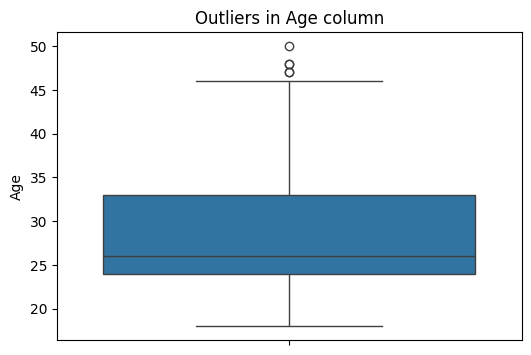

In [ ]:
#AGE OUTLIERS
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y='Age')
plt.title('Outliers in Age column')

In [ ]:
iqr=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
ll=df['Age'].quantile(0.25) - (1.5*iqr) #lower limit -> 10.5
ul=df['Age'].quantile(0.75) + (1.5*iqr) #upper limit -> 46.5
ll

10.5

In [ ]:
df[(df['Age']>46.5)|(df['Age']<10.5)] #outliers in Age column

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


Text(0.5, 1.0, 'Outliers in Education column')

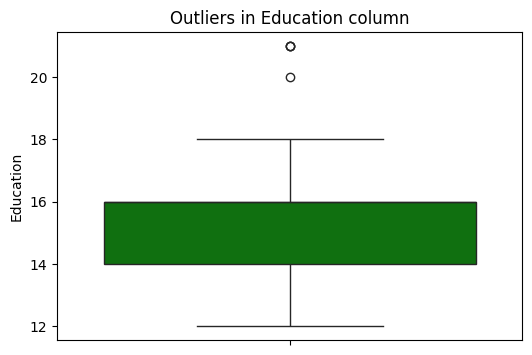

In [ ]:
#EDUCATION (in years) OUTLIERS
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y='Education',color='green')
plt.title('Outliers in Education column')

In [ ]:
df['Education'].quantile(0.5)

16.0

In [ ]:
iqr_education = df['Education'].quantile(0.75)-df['Education'].quantile(0.25)
ul_education=df['Education'].quantile(0.75) + (1.5*iqr_education)
ll_education=df['Education'].quantile(0.25) - (1.5*iqr_education)
ll_education

11.0

In [ ]:
df[(df['Education']>19)|(df['Education']<11)] #outliers in Education column

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


Text(0.5, 1.0, 'Outliers in Usage column')

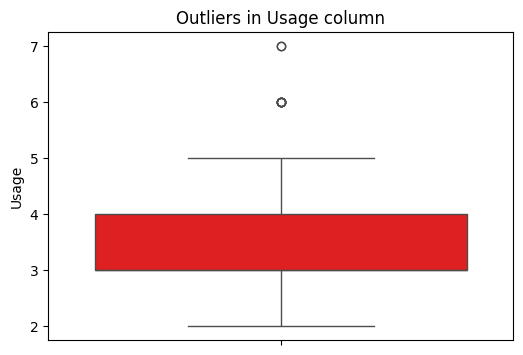

In [ ]:
#USAGE OUTLIERS
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y='Usage',color='red')
plt.title('Outliers in Usage column')

In [ ]:
df['Usage'].quantile(0.5)

3.0

In [ ]:
iqr_Usage = df['Usage'].quantile(0.75)-df['Usage'].quantile(0.25)
ul_Usage=df['Usage'].quantile(0.75) + (1.5*iqr_Usage)
ll_Usage=df['Usage'].quantile(0.25) - (1.5*iqr_Usage)
ll_Usage

1.5

In [ ]:
df[(df['Usage']>5.5)|(df['Usage']<1.5)] #outliers in Usage column

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


Text(0.5, 1.0, 'Outliers in Fitness column')

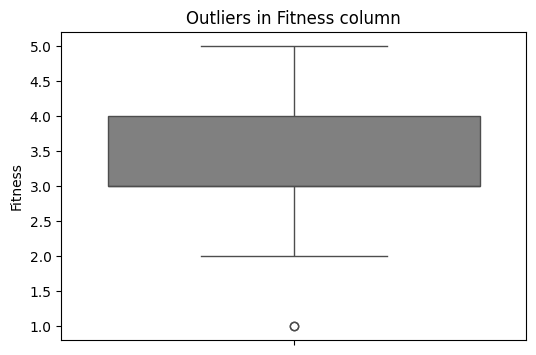

In [ ]:
#FITNESS OUTLIERS
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y='Fitness',color='gray')
plt.title('Outliers in Fitness column')

In [ ]:
df['Fitness'].quantile(0.5)

3.0

In [ ]:
iqr_Fitness = df['Fitness'].quantile(0.75)-df['Fitness'].quantile(0.25)
ul_Fitness=df['Fitness'].quantile(0.75) + (1.5*iqr_Fitness)
ll_Fitness=df['Fitness'].quantile(0.25) - (1.5*iqr_Fitness)
ul_Fitness

5.5

In [ ]:
df[(df['Fitness']>5.5)|(df['Fitness']<1.5)] #outliers in Fitness column

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


Text(0.5, 1.0, 'Outliers in Income column')

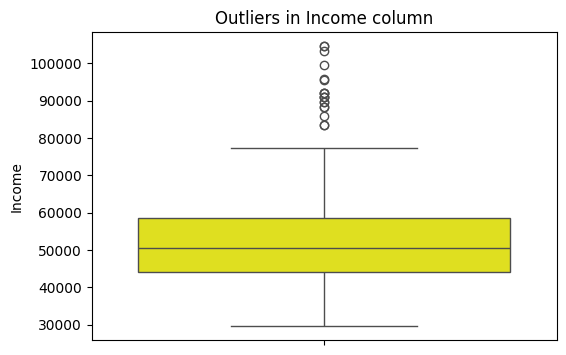

In [ ]:
#INCOME OUTLIERS
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y='Income',color='yellow')
plt.title('Outliers in Income column')

In [ ]:
df['Income'].quantile(0.5)

50596.5

In [ ]:
iqr_Income = df['Income'].quantile(0.75)-df['Income'].quantile(0.25)
ul_Income=df['Income'].quantile(0.75) + (1.5*iqr_Income) #80581.875
ll_Income=df['Income'].quantile(0.25) - (1.5*iqr_Income) #22144.875

In [ ]:
df[(df['Income']>80581.875)|(df['Income']<22144.875)] #outliers in Income column

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


Text(0.5, 1.0, 'Outliers in Miles column')

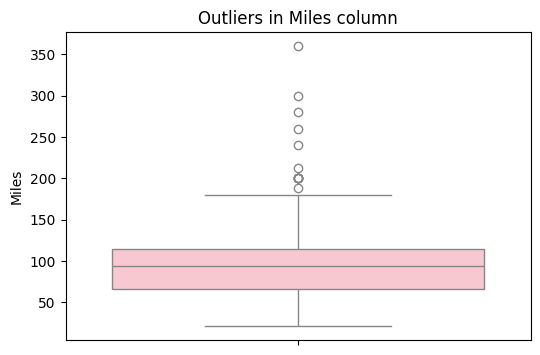

In [ ]:
#MILES OUTLIERS
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y='Miles',color='pink')
plt.title('Outliers in Miles column')

In [ ]:
df['Miles'].quantile(0.5)

94.0

In [ ]:
iqr_Miles = df['Miles'].quantile(0.75)-df['Miles'].quantile(0.25)
ul_Miles=df['Miles'].quantile(0.75) + (1.5*iqr_Miles) #187.875
ll_Miles=df['Miles'].quantile(0.25) - (1.5*iqr_Miles) #-7.125 - Does not make sense practically

In [ ]:
df[(df['Miles']>187.875)] #outliers in Miles column

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


###Observations:
- Age, Education, Usage, Fitness data columns have very less (<10) outliers
- Miles and Income data columns have plenty of outliers in the given dataset.


##Clipping data using np.clip()

In [ ]:
#Age:

df['Age'] = np.clip(df['Age'],df['Age'].quantile(0.05),np.round(df['Age'].quantile(0.95),2)) #5 percentile=20, 95 percentile = 43.049
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3,4,29562,112
1,KP281,20.0,Male,15,Single,2,3,31836,75
2,KP281,20.0,Female,14,Partnered,4,3,30699,66
3,KP281,20.0,Male,12,Single,3,3,32973,85
4,KP281,20.0,Male,13,Partnered,4,2,35247,47


In [ ]:
#Education:

df['Education'] = np.clip(df['Education'],df['Education'].quantile(0.05),df['Education'].quantile(0.95)) #5 percentile=14, 95 percentile = 18
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3,4,29562,112
1,KP281,20.0,Male,15,Single,2,3,31836,75
2,KP281,20.0,Female,14,Partnered,4,3,30699,66
3,KP281,20.0,Male,14,Single,3,3,32973,85
4,KP281,20.0,Male,14,Partnered,4,2,35247,47


In [ ]:
#Usage:

df['Usage'] = np.clip(df['Usage'],df['Usage'].quantile(0.05),np.round(df['Usage'].quantile(0.95),2)) #5 percentile=2, 95 percentile = 5.05
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,29562,112
1,KP281,20.0,Male,15,Single,2.0,3,31836,75
2,KP281,20.0,Female,14,Partnered,4.0,3,30699,66
3,KP281,20.0,Male,14,Single,3.0,3,32973,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247,47


In [ ]:
#Fitness:

df['Fitness'] = np.clip(df['Fitness'],df['Fitness'].quantile(0.05),df['Fitness'].quantile(0.95)) #5 percentile=2, 95 percentile = 5
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,29562,112
1,KP281,20.0,Male,15,Single,2.0,3,31836,75
2,KP281,20.0,Female,14,Partnered,4.0,3,30699,66
3,KP281,20.0,Male,14,Single,3.0,3,32973,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247,47


In [ ]:
#Income:

df['Income'] = np.clip(df['Income'],df['Income'].quantile(0.05),np.round(df['Income'].quantile(0.95),2)) #5 percentile=34053.15, 95 percentile = 90948.25
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [ ]:
#Miles:

df['Miles'] = np.clip(df['Miles'],df['Miles'].quantile(0.05),df['Miles'].quantile(0.95)) #5 percentile=47, 95 percentile = 200
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [ ]:
df.shape

(180, 9)

####There are 180 records/ rows and 9 columns in the dataset.

###Univariate Analysis
Understanding the distribution of the data for the quantitative attributes:
Age, Education, Usage, Fitness, Income, Miles

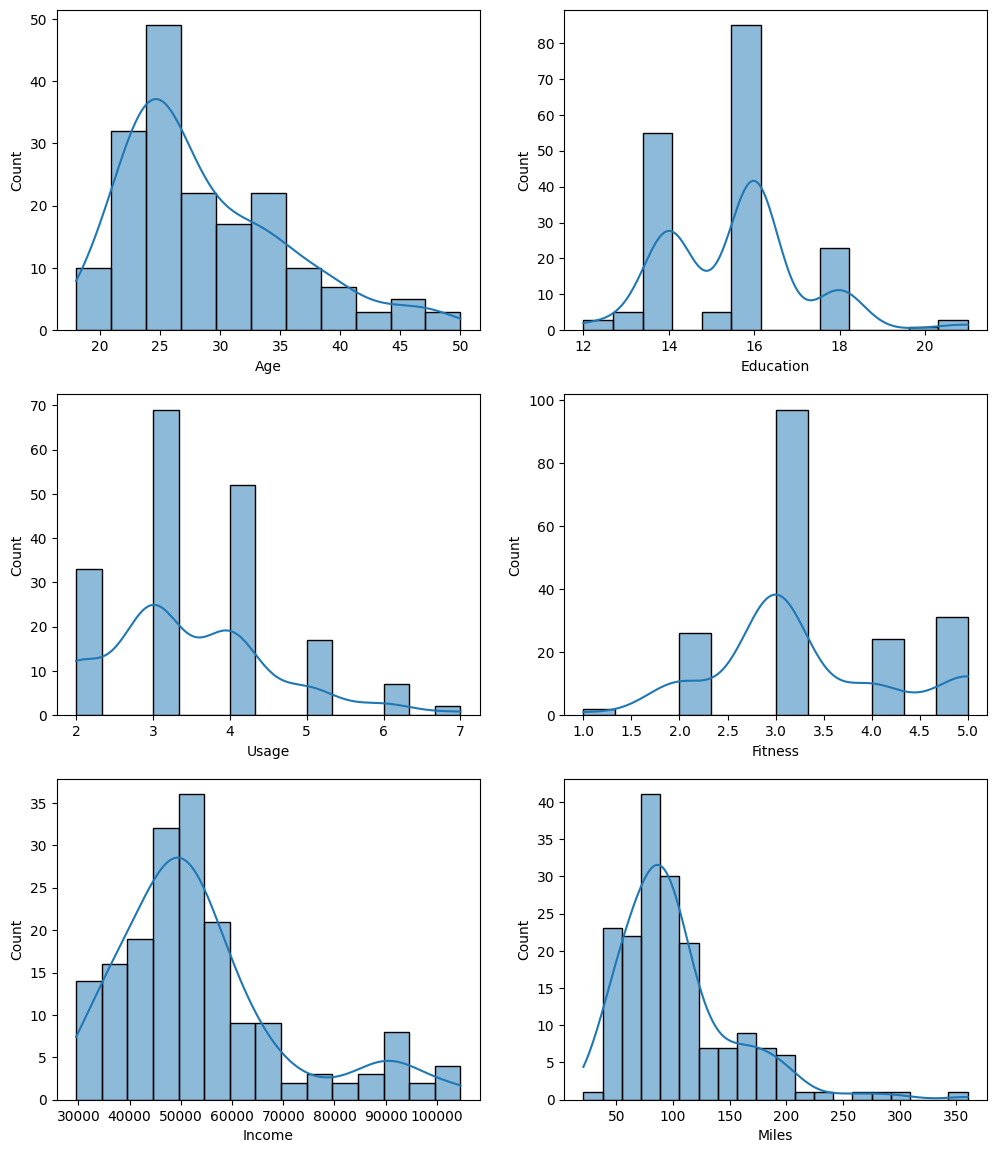

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

## 3. Check if features like marital status, Gender, and age have any effect on the product purchased


*   Find if there is any relationship between the categorical variables and the output variable in the data.

    Hint: We want you to use the count plot to find the relationship between categorical variables and output variables.
*   Find if there is any relationship between the continuous variables and the output variable in the data.

    Hint: We want you to use a scatter plot to find the relationship between continuous variables and output variables.


Creating New Column and Categorizing values in Age,Education,Income and Miles to different classes for better visualization

Categorizing the values in age column in 4 different buckets:
1. Young Adult: from 18 - 25
2. Adults: from 26 - 35
3. Middle Aged Adults: 36-45
4. Elder :46 and above

Categorizing the values in education column in 3 different buckets:
1. Primary Education: upto 12
2. Secondary Education: 13 to 15
3. Higher Education: 16 and above

Categorizing the values in Income column in 4 different buckets:
1. Low Income - Upto 40,000
2. Moderate Income - 40,000 to 60,000
3. High Income - 60,000 to 80,000
4. Very High Income - Above 80,000

Categorizing the values in miles column in 4 different buckets:
1. Light Activity - Upto 50 miles
2. Moderate Activity - 51 to 100 miles
3. Active Lifestyle - 101 to 200 miles
4. Fitness Enthusiast - Above 200 miles

In [16]:
#age bins
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']
df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

#education bins
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']
df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

#income bins
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']
df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)

#miles bins
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']
df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)

In [17]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


Text(0.5, 1.0, 'Marital Status effect on Product Purchased')

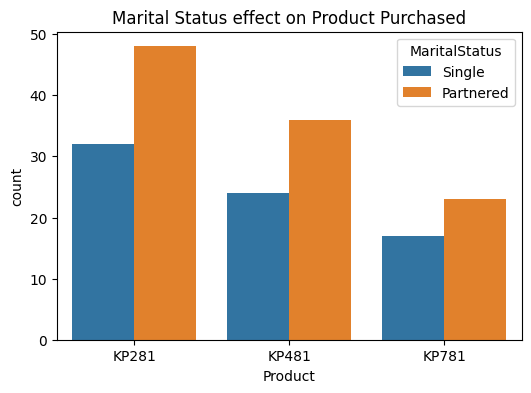

In [ ]:
#Marital Status effect on Product Purchased
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.title('Marital Status effect on Product Purchased')

Insights:

-- We can see that, for all 3 products, Partnered customers tend to buy the aerofit products more than single customers.

Text(0.5, 1.0, 'Gender effect on Product Purchased')

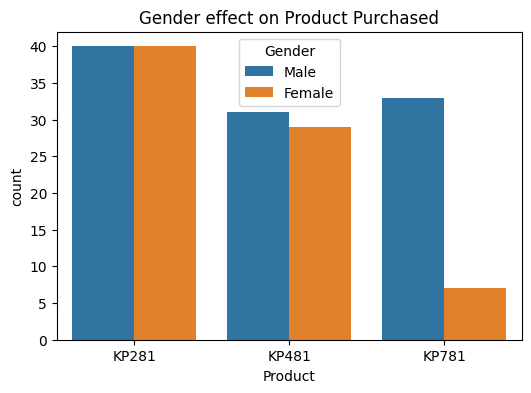

In [ ]:
#Gender effect on Product Purchased
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Product',hue='Gender')
plt.title('Gender effect on Product Purchased')

Insights:

-- We see that KP281 has equal distribution based on gender, but KP781 is bought more by Male users than female.

Text(0.5, 1.0, 'Age effect on Product Purchased')

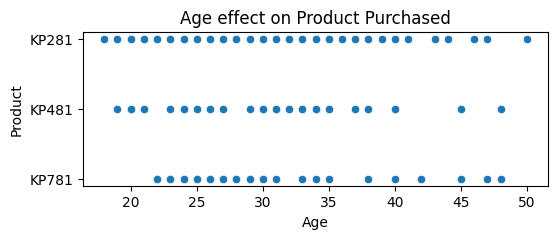

In [39]:
#Age effect on Product Purchased
plt.figure(figsize=(6,2))
sns.scatterplot(data=df,x='Age',y='Product')
plt.title('Age effect on Product Purchased')

<Axes: xlabel='Product', ylabel='Age'>

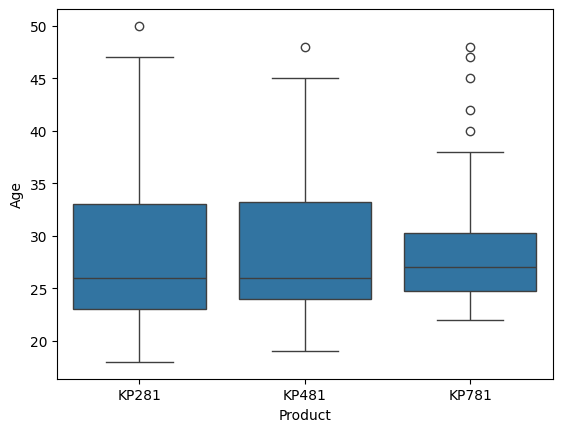

In [41]:
#PRODUCT vs AGE
sns.boxplot(data=df, x='Product', y='Age')

Insights:

-- We see that the median age of customers purchasing KP281 and KP481 is almost the same.

-- KP781 is mostly bought by people in the age group 25 to 30.

<Axes: xlabel='Product', ylabel='Education'>

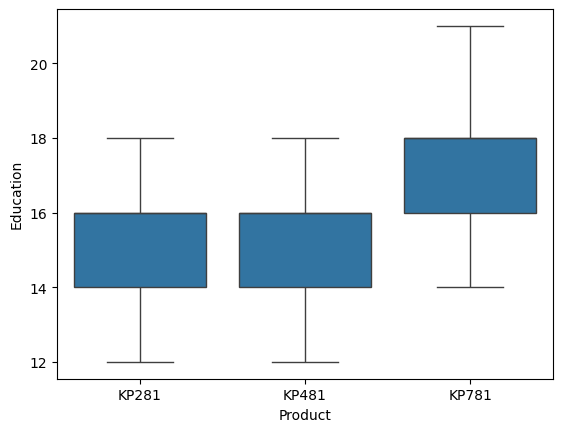

In [42]:
#PRODUCT vs EDUCATION
sns.boxplot(data=df, x='Product', y='Education')

Insights:

-- People who have completed 16 years of education tend to buy KP781. On the other hand, people who have less than 16 years of education have equal chances of buying KP281 and KP481.

<Axes: xlabel='Product', ylabel='Usage'>

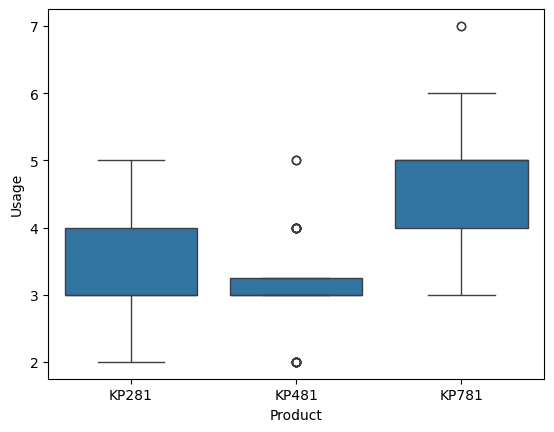

In [43]:
#PRODUCT vs USAGE
sns.boxplot(data=df, x='Product', y='Usage')

Insights:

--Customers who use treadmill atleast 4-5 times a week tend to buy KP781, rest fo the user base mostly buy KP281 and KP481.

<Axes: xlabel='Product', ylabel='Fitness'>

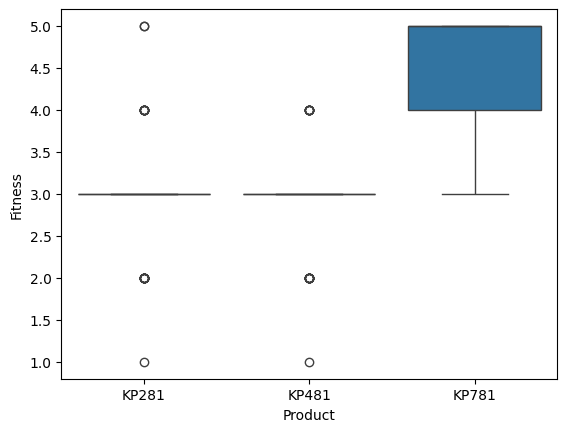

In [44]:
#PRODUCT vs FITNESS
sns.boxplot(data=df, x='Product', y='Fitness')

Insights:

-- People who are in good shape, having better fitness of more than 4 on the scale of 1 to 5, use KP781.

-- People using KP281 and KP481 mostly have moderate fitness value, i.e: 3

<Axes: xlabel='Product', ylabel='Income'>

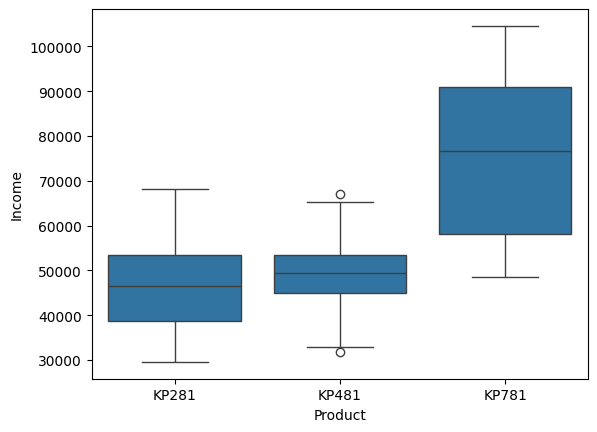

In [45]:
#PRODUCT vs INCOME
sns.boxplot(data=df, x='Product', y='Income')

Insights:

--Since KP781 is on the costlier side, people having income greater than 60,000$ are able to buy it. The rest of the user base buys KP281 and KP481.

<Axes: xlabel='Product', ylabel='Miles'>

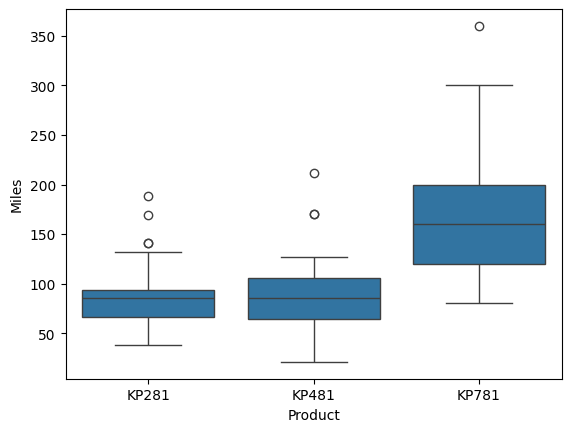

In [47]:
#PRODUCT vs MILES
sns.boxplot(data=df, x='Product', y='Miles')

Insights:

-- People who buy KP781 are the people who usually tend to walk more than 120 miles per week. it shows that KP781 is very ideal for people who workout regularly and have interest in maintaining their fitness levels to a good shape.

## 4. Representing the Probability

*   Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

    Hint: We want you to use the pandas crosstab to find the marginal probability of each product.
*   Find the probability that the customer buys a product based on each column.

    Hint: Based on previous crosstab values you find the probability.

*   Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she'll purchase a KP481)

    Hint: Based on previous crosstab values you find the probability.



In [ ]:
pd.crosstab(index=df['Product'],columns='Product',margins=True,normalize=True)

col_0,Product,All
Product,,
KP281,0.444444,0.444444
KP481,0.333333,0.333333
KP781,0.222222,0.222222
All,1.000000,1.000000


Analysis:

- 44.44% of customers have purchased Product KP281
- 33.33% of customers have purchased Product KP481
- 22.22% of customers have purchased Product KP781

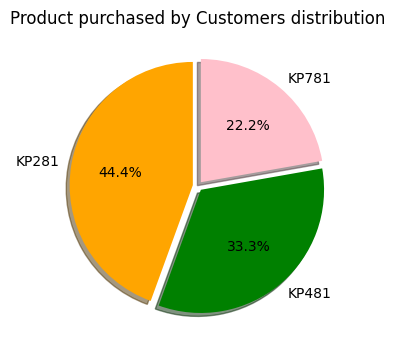

In [ ]:
#Product purchased by Customers distribution
plt.figure(figsize=(6,4))
plt.pie(df['Product'].value_counts(),explode=(0.04,0.04,0.04), labels=df['Product'].value_counts().index,colors=['orange','green','pink'],
        autopct='%.1f%%',startangle=90,shadow=True)
plt.title('Product purchased by Customers distribution')
plt.show()

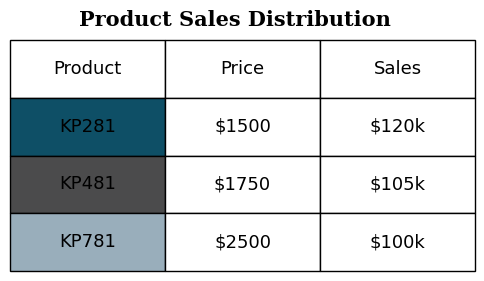

In [28]:
fig = plt.figure(figsize = (6,3))
gs = fig.add_gridspec(1,1)

ax2 = fig.add_subplot(gs[0,0])
product_portfolio = [['KP281','$1500','$120k'],['KP481','$1750','$105k'],['KP781','$2500','$100k']]
color_2d = [['#0e4f66','#FFFFFF','#FFFFFF'],['#4b4b4c','#FFFFFF','#FFFFFF'],['#99AEBB','#FFFFFF','#FFFFFF']]
table = ax2.table(cellText = product_portfolio, cellColours=color_2d, cellLoc='center',colLabels =['Product','Price','Sales'],
 colLoc = 'center',bbox =[0, 0, 1, 1])
table.set_fontsize(13)

ax2.axis('off')

fig.suptitle('Product Sales Distribution',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})
plt.show()


Insights:

1.KP281 has the highest number of units sold, i.e: 44% of total unit sales.

2.All three product variants have sales of minimum of 100k dollars.

Text(0.5, 1.0, 'Marital Status Distribution')

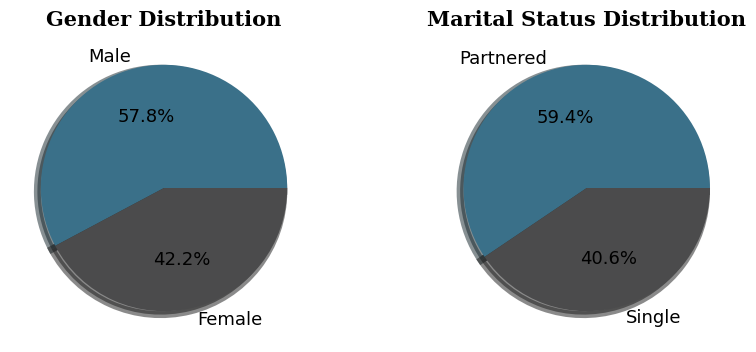

In [30]:
fig = plt.figure(figsize = (10,4))
gs = fig.add_gridspec(1,2)
 # creating pie chart for gender disribution and marital status
ax0 = fig.add_subplot(gs[0,0])
color_map = ["#3A7089", "#4b4b4c"]

ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
 shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

ax1 = fig.add_subplot(gs[0,1])

ax1.pie(df['MaritalStatus'].value_counts().values,labels = df['MaritalStatus'].value_counts().index,autopct = '%.1f%%',
 shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

ax0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})
ax1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})


In [ ]:
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


There are 42% female and 58% of males users of Aerofit products.

In [ ]:
#Conditional Probability given the gender of a person
pd.crosstab(index=df['Product'],columns=df['Gender'],normalize='columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


Insights-
1. Given that the customer is male, the probability of them buying the products is 38%,29%,31% for KP281,KP481,KP781 respectively.
2. Given that the customer is female, the probability of them buying the products is 52%,38%,9% for KP281,KP481,KP781 respectively.
3. Male users buy KP781 way more than Female users.

In [ ]:
#Conditional Probability given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['Gender'],normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


Insights-

1. Given that the customer has purchased KP281, the probability of customers being female and male is 50%,50% respectively.
2. Given that the customer has purchased KP481, the probability of customers being female and male is 48%,52% respectively.
3. Given that the customer has purchased KP781, the probability of customers being female and male is 17%,82% respectively.

In [32]:
pd.crosstab(index=df['Product'],columns=df['edu_group'],margins=True,normalize=True)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.011111,0.205556,0.227778,0.444444
KP481,0.005556,0.144444,0.183333,0.333333
KP781,0.000000,0.011111,0.211111,0.222222
All,0.016667,0.361111,0.622222,1.000000


In [33]:
#Conditional Probability given the Education of a person
pd.crosstab(index=df['Product'],columns=df['edu_group'],normalize='columns')

edu_group,Primary Education,Secondary Education,Higher Education
Product,,,
KP281,0.666667,0.569231,0.366071
KP481,0.333333,0.400000,0.294643
KP781,0.000000,0.030769,0.339286


Insights:

1. Given that the customer has completed Primary education, There is 66.6% chace that they might buy KP281, 33% chance that they buy KP481 and 0% chance that they buy KP781.
2. Given that the customer has completed Secondary education, There is 56.9% chace that they might buy KP281, 40% chance that they buy KP481 and 3% chance that they buy KP781.
3. Given that the customer has completed Higher education, There is 36.6% chace that they might buy KP281, 29% chance that they buy KP481 and 33% chance that they buy KP781.

In [34]:
#Conditional Probability of person being educated till # no of years given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['edu_group'],normalize='index')

edu_group,Primary Education,Secondary Education,Higher Education
Product,,,
KP281,0.025000,0.462500,0.5125
KP481,0.016667,0.433333,0.5500
KP781,0.000000,0.050000,0.9500


Insights:

1. Given that the customer has bought KP281, there is a 2%,46%,51% probability that they have completed Primary, secondary and higher education respectively.
2. Given that the customer has bought KP481, there is 1.6%,43%,55% probability that they have completed Primary, secondary and higher education respectively.
3. Given that the customer has bought KP781, there is 0%,5%,95% probability that they have completed Primary, secondary and higher education respectively.

In [35]:
pd.crosstab(index=df['Product'],columns=df['age_group'],margins=True,normalize=True)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.188889,0.177778,0.061111,0.016667,0.444444
KP481,0.155556,0.133333,0.038889,0.005556,0.333333
KP781,0.094444,0.094444,0.022222,0.011111,0.222222
All,0.438889,0.405556,0.122222,0.033333,1.000000


In [36]:
#Conditional Probability given the Age of a person
pd.crosstab(index=df['Product'],columns=df['age_group'],normalize='columns')

age_group,Young Adults,Adults,Middle Aged Adults,Elder
Product,,,,
KP281,0.43038,0.438356,0.500000,0.500000
KP481,0.35443,0.328767,0.318182,0.166667
KP781,0.21519,0.232877,0.181818,0.333333


Insights:
1. Given that the customer belongs to the Young adult category (18 to 25 age group), The probability of buying KP281,KP481 and KP781 are 43%,35.5% and 21.5% respectively.
2. Given that the customer belongs to the Adults category (26 to 35 age group), The probability of buying KP281,KP481 and KP781 are 44%,33% and 23% respectively.
3. Given that the customer belongs to the Middle aged adult category (36 to 45 age), The probability of buying KP281,KP481 and KP781 are 50%,32% and 18% respectively.
4. Given that the customer belongs to the Elder category (46 and above), The probability of buying KP281,KP481 and KP781 are 50%,16.6% and 33.4% respectively.

In [37]:
#Conditional Probability of person's age given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['age_group'],normalize='index')

age_group,Young Adults,Adults,Middle Aged Adults,Elder
Product,,,,
KP281,0.425000,0.400,0.137500,0.037500
KP481,0.466667,0.400,0.116667,0.016667
KP781,0.425000,0.425,0.100000,0.050000


Insights:

1. Given that the person has bought the products, there is more than 82% probable that they are of the age group 18 to 35 years.
2. Very less probability of customers being elder provided that they have bought the product.

In [ ]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,normalize=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [ ]:
#Conditional Probability given the MaritalStatus of a person
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],normalize='columns')

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


In [ ]:
#Conditional Probability given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],normalize='index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


In [49]:
pd.crosstab(index=df['Product'],columns=df['Usage'],margins=True,normalize=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000,0.444444
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000,0.333333
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111,0.222222
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111,1.000000


In [ ]:
#Conditional Probability given the Usage of a person
pd.crosstab(index=df['Product'],columns=df['Usage'],normalize='columns')

Usage,2.00,3.00,4.00,5.00,5.05
Product,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0


Insights:

1. Given that the user has less than 3 times of treadmill exercise per week, there is more than 98% chance that they buy KP281 and KP481.
2. If user has tendency to use treadmill more than 4 times per week, they mostly buy KP781 (around 70% chance)

In [ ]:
#Conditional Probability given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['Usage'],normalize='index')

Usage,2.00,3.00,4.00,5.00,5.05
Product,,,,,
KP281,0.237500,0.462500,0.275,0.025,0.000
KP481,0.233333,0.516667,0.200,0.050,0.000
KP781,0.000000,0.025000,0.450,0.300,0.225


In [ ]:
pd.crosstab(index=df['Product'],columns=df['Fitness'],margins=True,normalize=True)

Fitness,2,3,4,5,All
Product,,,,,
KP281,0.083333,0.300000,0.050000,0.011111,0.444444
KP481,0.072222,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.022222,0.038889,0.161111,0.222222
All,0.155556,0.538889,0.133333,0.172222,1.000000


Observation: Majority of the users using Aerofit products have fitness of 3 on the scale of 1 to 5

In [ ]:
#Conditional Probability given the Fitness of a person
pd.crosstab(index=df['Product'],columns=df['Fitness'],normalize='columns')

Fitness,2,3,4,5
Product,,,,
KP281,0.535714,0.556701,0.375000,0.064516
KP481,0.464286,0.402062,0.333333,0.000000
KP781,0.000000,0.041237,0.291667,0.935484


In [ ]:
#Conditional Probability given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['Fitness'],normalize='index')

Fitness,2,3,4,5
Product,,,,
KP281,0.187500,0.675,0.112500,0.025
KP481,0.216667,0.650,0.133333,0.000
KP781,0.000000,0.100,0.175000,0.725


In [50]:
pd.crosstab(index=df['Product'],columns=df['miles_group'],margins=True,normalize=True)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.066667,0.277778,0.100000,0.000000,0.444444
KP481,0.027778,0.216667,0.083333,0.005556,0.333333
KP781,0.000000,0.044444,0.150000,0.027778,0.222222
All,0.094444,0.538889,0.333333,0.033333,1.000000


In [51]:
#Conditional Probability given the Miles walked
pd.crosstab(index=df['Product'],columns=df['miles_group'],normalize='columns')

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast
Product,,,,
KP281,0.705882,0.515464,0.30,0.000000
KP481,0.294118,0.402062,0.25,0.166667
KP781,0.000000,0.082474,0.45,0.833333


Observations: People who are Fitness Enthusiasts and Active Lifestyle usually go for KP781. Others use KP281 and KP481.

In [52]:
#Conditional Probability given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['miles_group'],normalize='index')

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast
Product,,,,
KP281,0.150000,0.625,0.225,0.000000
KP481,0.083333,0.650,0.250,0.016667
KP781,0.000000,0.200,0.675,0.125000


In [53]:
pd.crosstab(index=df['Product'],columns=df['income_group'],margins=True,normalize=True)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.127778,0.283333,0.033333,0.000000,0.444444
KP481,0.050000,0.244444,0.038889,0.000000,0.333333
KP781,0.000000,0.061111,0.055556,0.105556,0.222222
All,0.177778,0.588889,0.127778,0.105556,1.000000


In [54]:
#Conditional Probability given the income of user
pd.crosstab(index=df['Product'],columns=df['income_group'],normalize='columns')

income_group,Low Income,Moderate Income,High Income,Very High Income
Product,,,,
KP281,0.71875,0.481132,0.260870,0.0
KP481,0.28125,0.415094,0.304348,0.0
KP781,0.00000,0.103774,0.434783,1.0


Observations: People with low income do not buy KP781, people with very high income only buy KP781.

In [55]:
#Conditional Probability given that the person has purchased the product
pd.crosstab(index=df['Product'],columns=df['income_group'],normalize='index')

income_group,Low Income,Moderate Income,High Income,Very High Income
Product,,,,
KP281,0.2875,0.637500,0.075000,0.000
KP481,0.1500,0.733333,0.116667,0.000
KP781,0.0000,0.275000,0.250000,0.475


## 5. Check the correlation among different factors

*   Find the correlation between the given features in the table.

    Hint: We want you can use the heatmap and corr function to find the correlation between the variables


In [ ]:
#Correlation:
correlation_matrix=df.corr()

<ipython-input-70-64c351c5a7eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


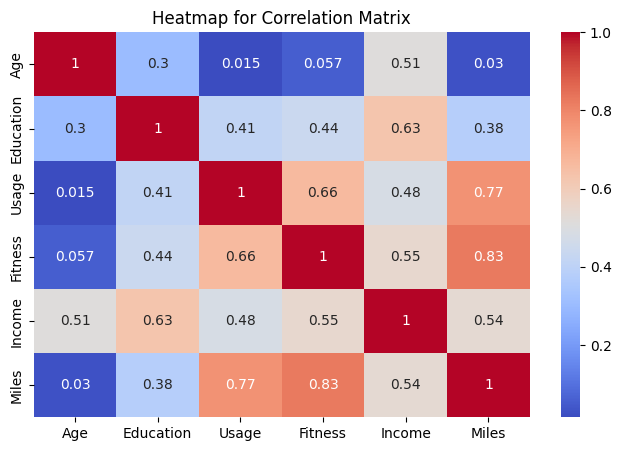

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Matrix')
plt.show()

Observations:

-- Miles is highly correlated with Usage and Fitness

-- Education and Income are positively correlated, so is the Age and Income.

--Fitness and Age are also positively correlated, which is correct in general.

### Pairplots

In [57]:
import copy
df_copy = copy.deepcopy(df)


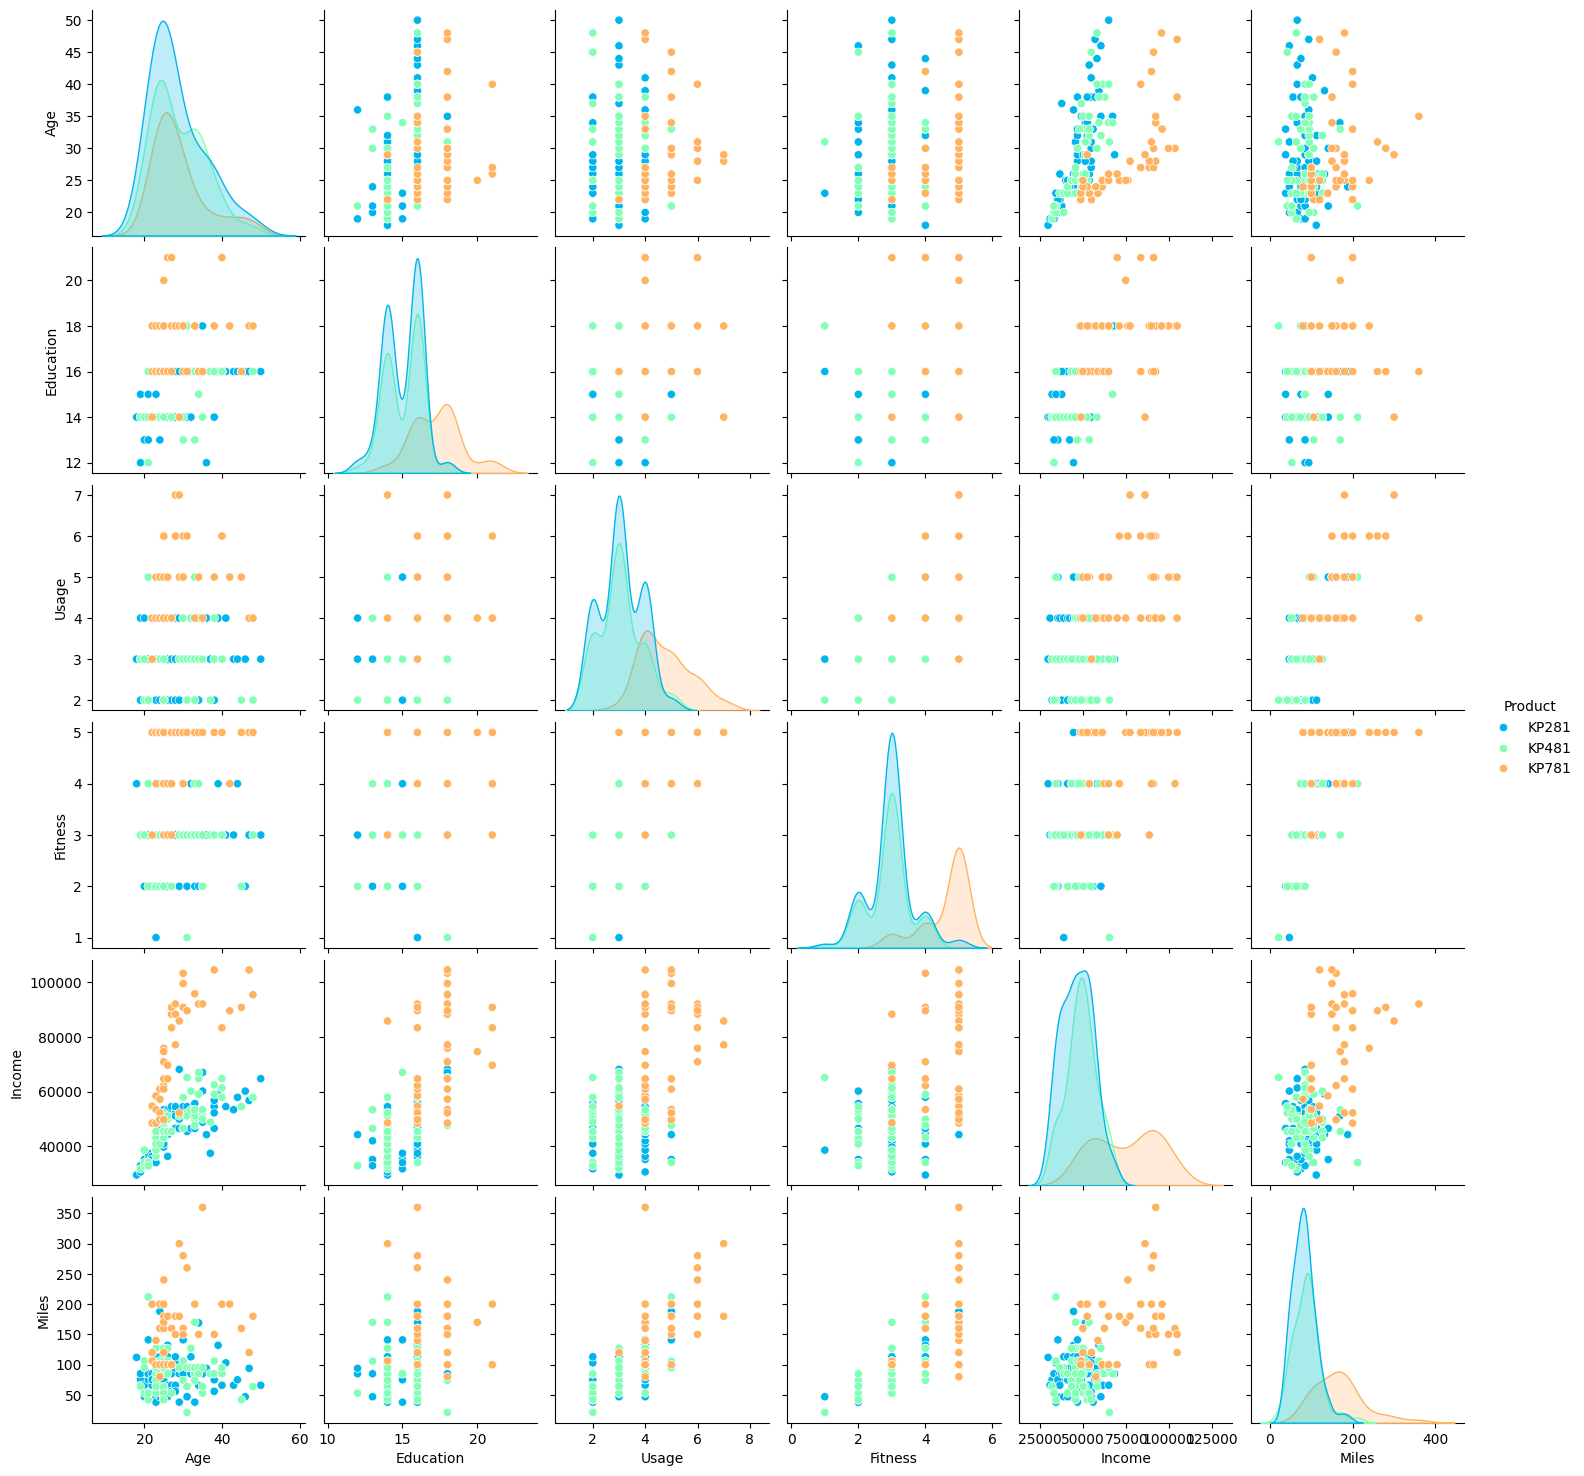

In [59]:
sns.pairplot(df_copy, hue ='Product', palette= 'rainbow')
plt.show()

##6. Customer profiling and recommendation

*   Make customer profilings for each and every product.

    Hint: We want you to find at What age, gender, and income group buys product KP281
*   Write a detailed recommendation from the analysis that you have done.


###Customer Profilings:

Based on above analysis -->

Probability of purchase of Product KP281 = 44%

Probability of purchase of Product KP481 = 33%

Probability of purchase of Product KP781 = 22%

1. Customer Profile for KP281:

- Gender - Both Male and Female - Equal distribution
- Age of customer mostly between 18 to 35 years with few between 35 to 50 years
- Education years of customer 13 years and above
- Annual Income of customer below USD 60,000
- Weekly Treadmill Usage - 2 to 4 times
- Fitness Scale - 2 to 4
- Weekly Running Miles - 50 to 100 miles


2. Customer Profile for KP481:

- Gender - Both Male and Female - Equal distribution
- Age of customer mostly between 18 to 35 years with few between 35 to 50 years
- Education years of customer 13 years and above
- Annual Income of customer between 40,000 and 80,000 USD.
- Weekly Treadmill Usage - 2 to 4 times
- Fitness Scale - 2 to 4
- Weekly Running Miles - 50 to 200 miles


3. Customer Profile for KP781:

- Gender - Mostly Male users
- Age of customer is majorly between 25 to 30 years.
- Education years of customer is mostly 16 years and above
- Annual Income of customer greater than 80,000 USD.
- Weekly Treadmill Usage - 4 to 7 times
- Fitness Scale - Greater than or equal to 4
- Weekly Running Miles - 120+ miles




##Recommendations:

- KP781 majorly caters to Male users, Aerofit needs to come up with a strategy that attracts Female users as well. Selective marketing strategy and advertising needs to be done to inspire and push more and more women to start using KP781. This might increase the very low 18% user base being female for KP781.

- KP281, which is the entry level runner treadmill needs to be more cost optimal. Since it is entry level and encourages users to start running for fitness, they can campaign around KP281 with lower costs, and then provide offers to upgrade to KP481 and KP781 gradually.

- Targeted marketing needed for KP781, since it is bringing in the major chunk of revenue and profits through its high price. Also, people with very high income will be able to afford it, so encouraging them to workout will be a better strategy for Aerofit.

- Tie up with gyms and fitness centers, customers of which will become a potential customers.

- Use Tools and technology to show and save the real-time fitness data and levels of the user through a digital application that can be installed in phones for ease of use and easy access that will ignite interest to workout in users. Announce rewards, gift cards for users that perform exceedingly well for the month or a quarter.

